# Introduction to Seaborn

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
%matplotlib inline

In [140]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


### Styling

In [142]:
sns.set_theme() #Apply the default theme

## Numerical Plots

* **Distribution**: Histogram, KDE (Kernel Density Estimate), Displot

* **Bar Plot**
* **Count Plot**
* **Box Plot**: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng
* **Facet Plot**: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.

* **Join Plot**
* **Pair Plot**

* **Heat Map**: một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều


### Distribution Plot
* Univariate distribution of observations

In [144]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


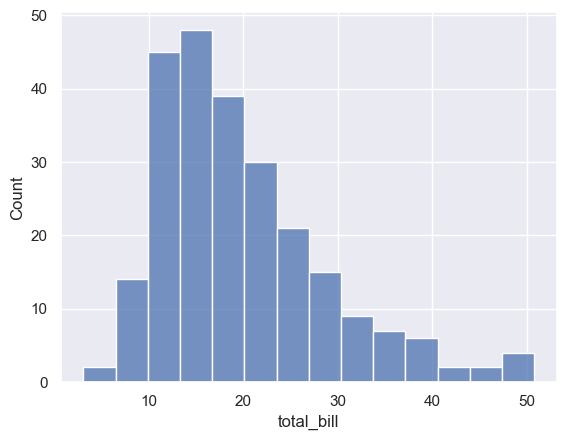

In [145]:
sns.histplot(data=tips_df.total_bill)
plt.show()

In [146]:
tips_df.total_bill.value_counts().sort_values()

total_bill
16.47    1
26.41    1
11.24    1
15.06    1
18.35    1
        ..
20.29    2
20.69    2
21.01    2
15.69    2
13.42    3
Name: count, Length: 229, dtype: int64

### KDE Plot
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
* KDE represents the data using a continuous probability density curve in one or more dimensions

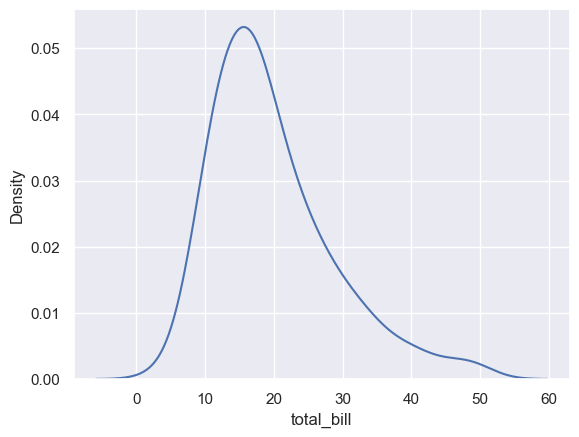

In [148]:
sns.kdeplot(data = tips_df.total_bill)
plt.show()

### Displot

* Informative distributional summaries
* Statistical analyses require knowledge about the distribution of variables in your dataset. 
* The seaborn function `displot()` supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation

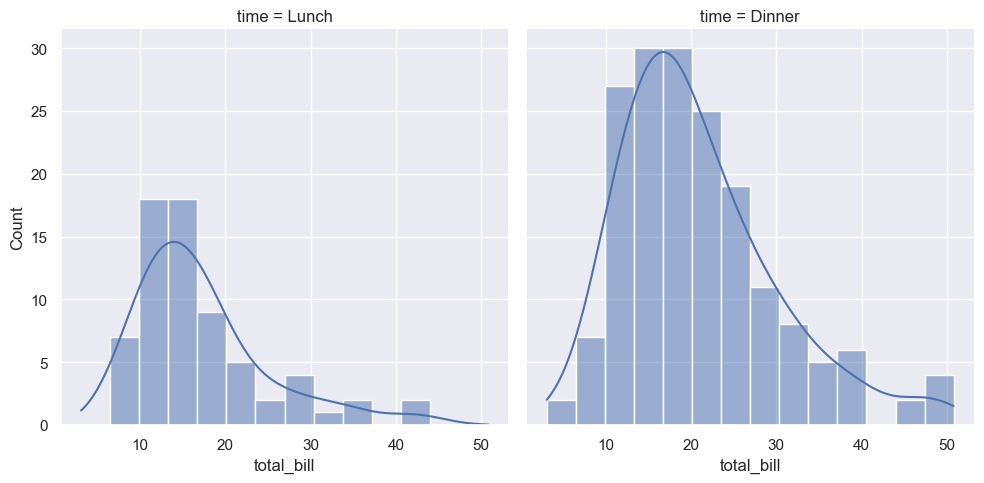

In [150]:
sns.displot(data=tips_df, x="total_bill", col="time", kde=True);
plt.show()

## Categorical Plots
### Bar Plots

In [152]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


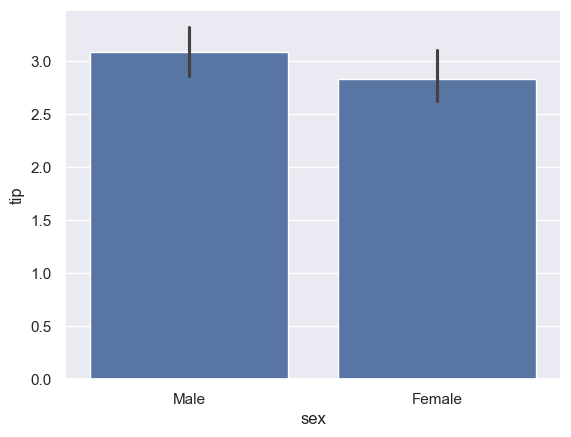

In [153]:
sns.barplot(data=tips_df, x="sex", y="tip", estimator=np.mean);
plt.show()

In [154]:
tips_df.sex.value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

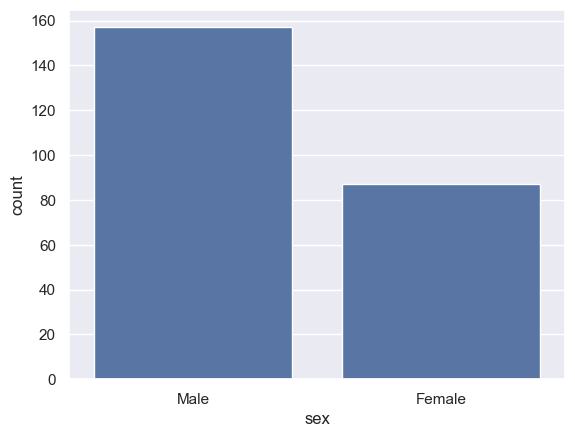

In [155]:
sns.countplot(data=tips_df, x="sex");
plt.show()

### Box Plot
Box Plot is a good indication of how the values in the data are spread out ("minium", first quartile (Q1), median, third quartile (Q3), and “maximum”)
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

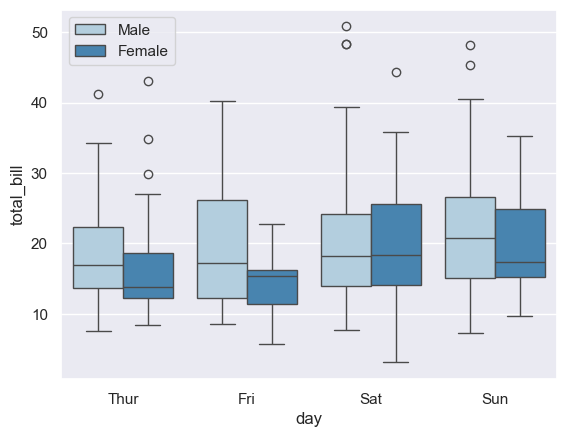

In [157]:
sns.boxplot(data=tips_df, x="day", y="total_bill", hue="sex", palette="Blues");
plt.legend(loc=0)
plt.show()

### Facet Grid
* FacetGrid can be drawn with up to three dimensions: `row`, `col`, and `hue`.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method. 

In [174]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


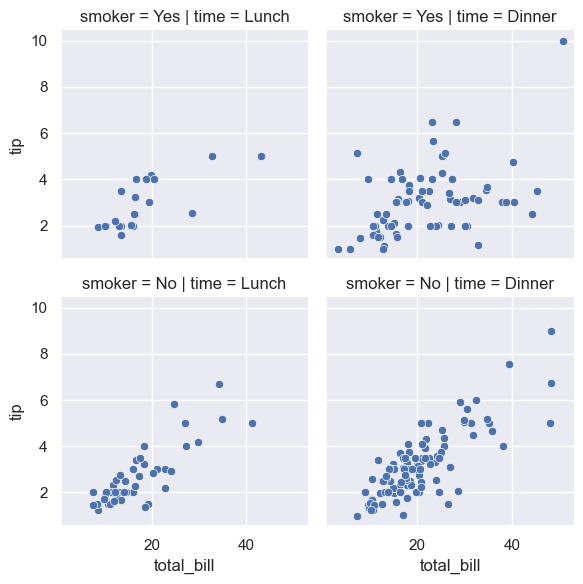

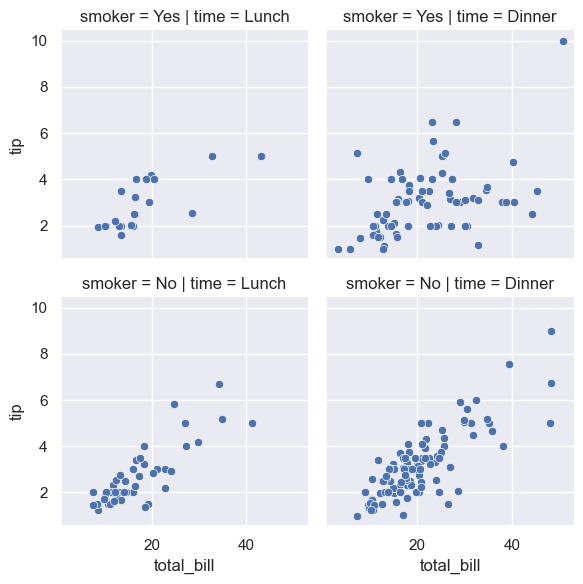

In [184]:
tips_fg = sns.FacetGrid(data=tips_df, row="smoker", col="time") #Create a class instance of Facet Grid class
tips_fg.map(sns.scatterplot,  'total_bill', 'tip');
plt.show()

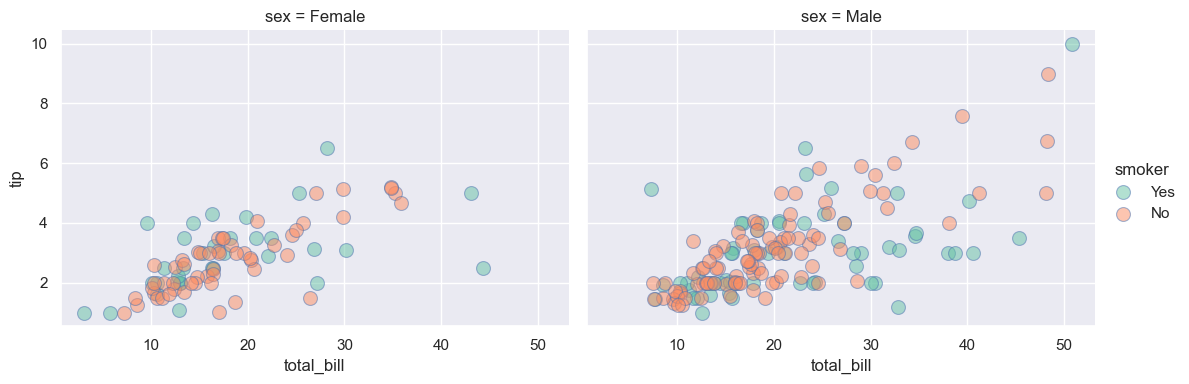

In [286]:
new_fg = sns.FacetGrid(data=tips_df, col="sex", col_order=["Female", "Male"], hue="smoker",
                      palette="Set2", height=4, aspect=1.4)
new_fg.map(sns.scatterplot, 'total_bill', 'tip', s=100, edgecolor="b", alpha=0.5)
new_fg.add_legend()
plt.show()

### Joint Plot
* `joint` distribution between two variables along with each variable’s marginal distribution

In [293]:
penguins_df = sns.load_dataset("penguins")

In [295]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


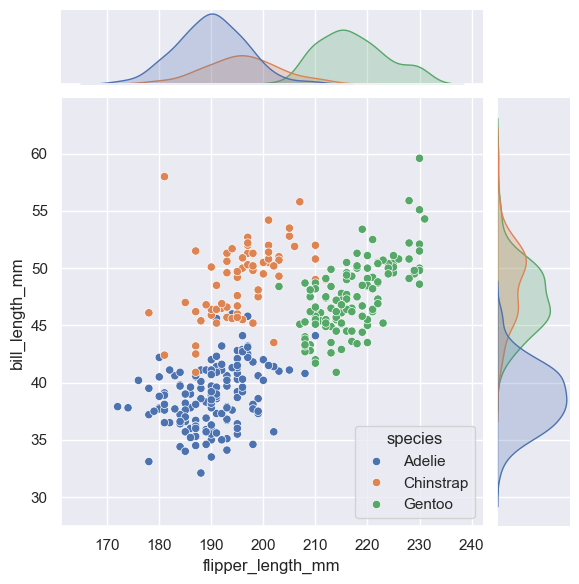

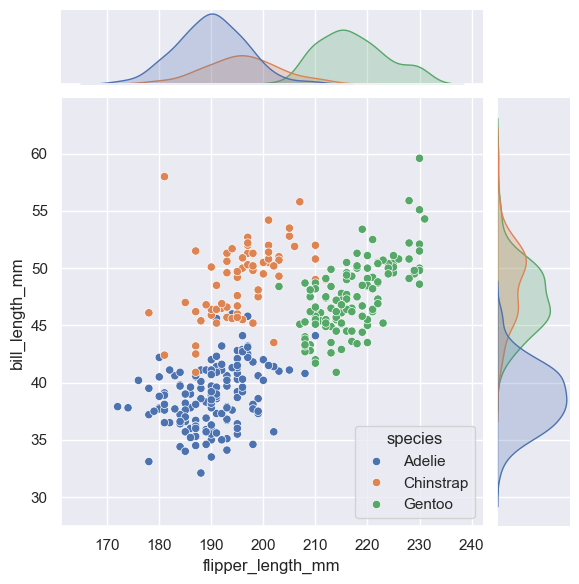

In [299]:
sns.jointplot(data = penguins_df, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

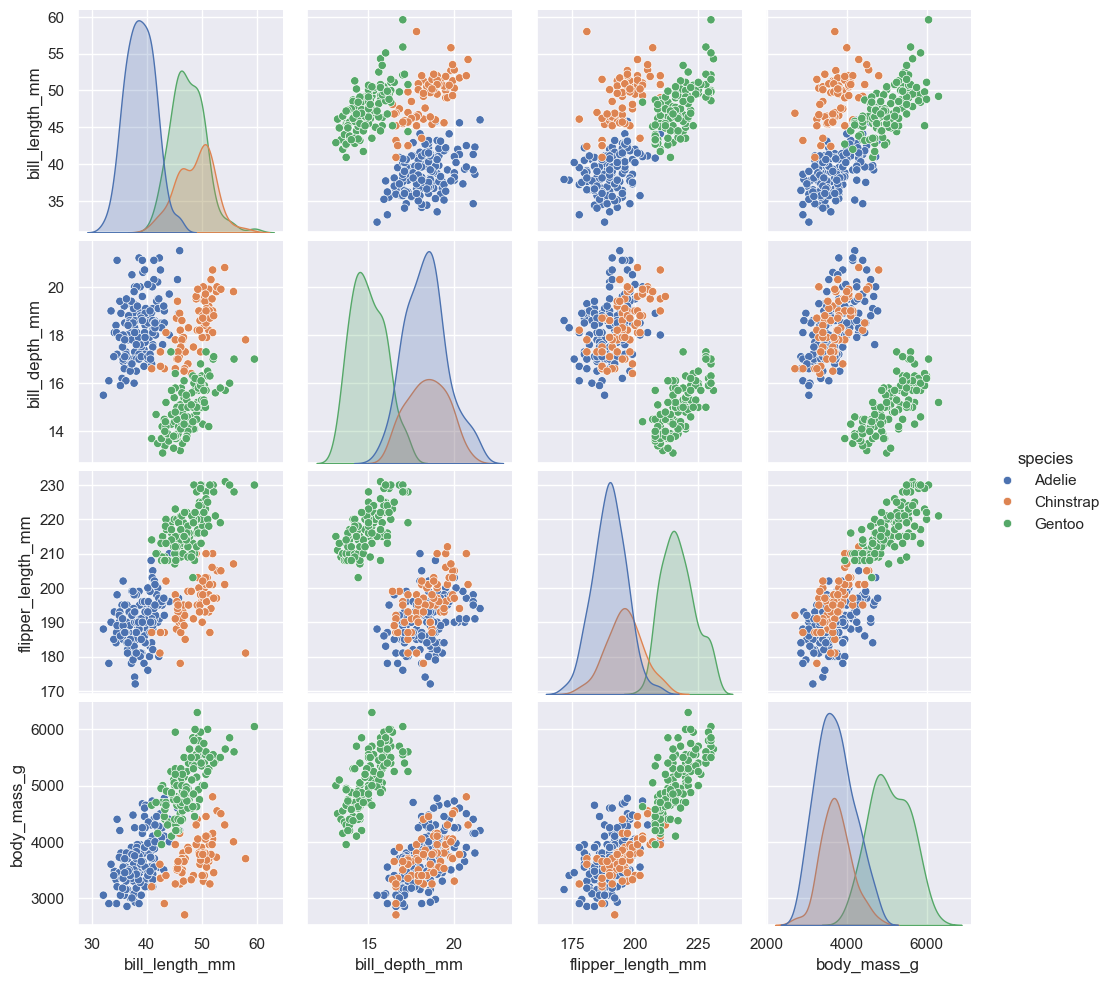

In [301]:
sns.pairplot(data=penguins_df, hue="species")
plt.show()

### Heatmaps
Describing density or intensity of variables, visualize patterns, variance, and even anomalies.

In [312]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [320]:
flights = pd.pivot_table(flights_df, index='month', columns='year', values='passengers', observed=False)
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


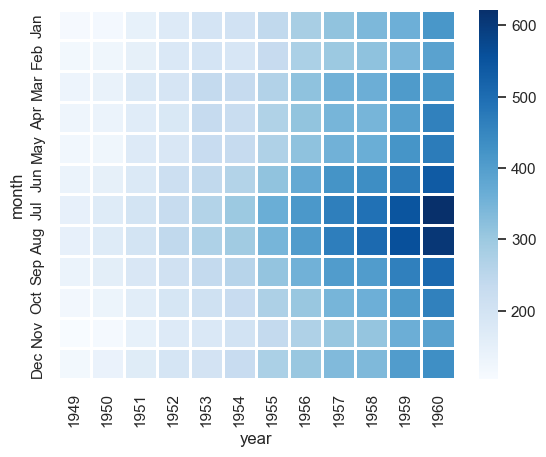

In [330]:
sns.heatmap(data=flights, cmap="Blues", linewidths=1)
plt.show()